### Ishaan Mehta E18CSE069 EB02 LabWeek 3

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
import urllib
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import timeit

In [75]:
path_dir=['/content/drive/My Drive/BTECH SEM 5/ECSE381l-DeepLearning/LAB3/data/cats/','/content/drive/My Drive/BTECH SEM 5/ECSE381l-DeepLearning/LAB3/data/dogs/']


In [93]:
def get_pixel_data(imgsize):
  start = timeit.default_timer()
  cat_imgs=os.listdir()
  image_pixel=[]
  for path in path_dir:
    os.chdir(path)
    imgs=os.listdir()
    for img in imgs:
      im=cv2.imread(img)
      resized = cv2.resize(im, (imgsize,imgsize), interpolation = cv2.INTER_AREA)
      pixels=resized.flatten()
      image_pixel.append(pixels)

  y_class=[]
  for i in range(21):
    if i<=10:
      y_class.append(1)
    else:
      y_class.append(0)
  X=np.array(image_pixel)
  y=np.array(y_class)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.550, random_state=32)
  logreg=LogisticRegression()
  logreg.fit(X_train,y_train)
  y_train_pred=logreg.predict(X_train)
  y_test_pred=logreg.predict(X_test)
  train_accuracy=accuracy_score(y_train, y_train_pred)
  test_accuracy=accuracy_score(y_test, y_test_pred)
  stop = timeit.default_timer()
  runtime=stop-start

  return train_accuracy,test_accuracy,runtime



  
  

In [94]:
img_size=[10,25,50,100,500]
train_accuracy=[]
test_accuracy=[]
runtime=[]
for i in img_size:
  tr_acc,te_acc,runt=get_pixel_data(i)
  train_accuracy.append(tr_acc)
  test_accuracy.append(te_acc)
  runtime.append(runt)


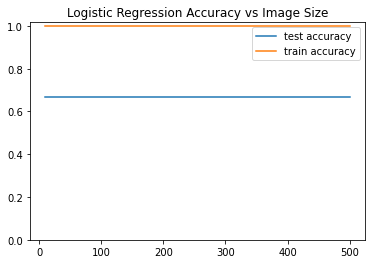

In [102]:
plt.plot(img_size,test_accuracy)
plt.plot(img_size,train_accuracy)
plt.title('Logistic Regression Accuracy vs Image Size')
plt.legend(['test accuracy','train accuracy'])
plt.ylim(ymin=0)
plt.show()



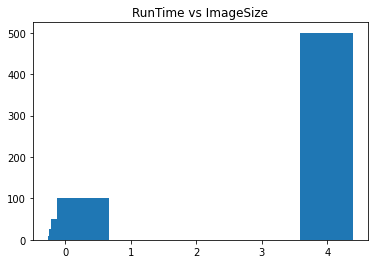

In [108]:
plt.bar(runtime,img_size)
plt.title('RunTime vs ImageSize')
plt.show()